# Test Segment Anything on Tumors

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

In [2]:
sam = sam_model_registry["vit_l"](checkpoint="../models/vit/sam_vit_l_0b3195.pth")

mask_generator = SamAutomaticMaskGenerator(sam)

In [3]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [4]:
image = cv2.imread('../data/317947.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
masks = mask_generator.generate(image)

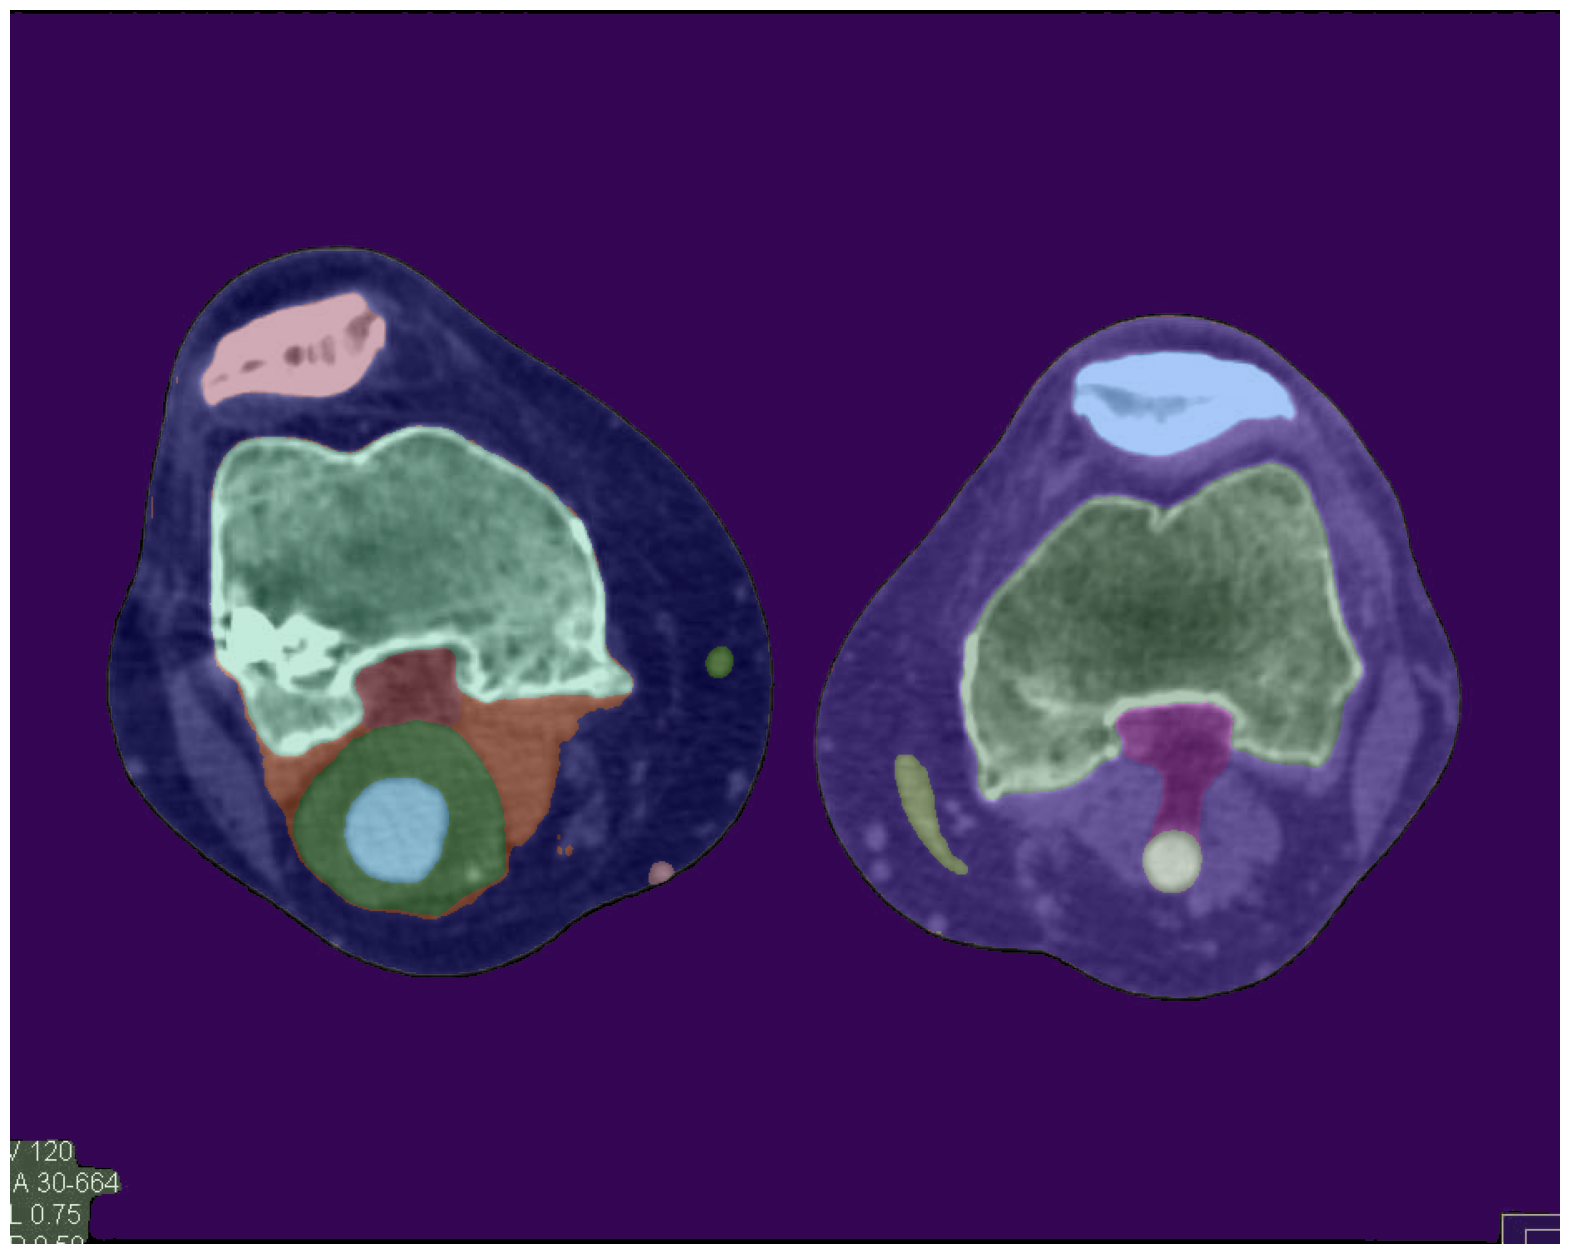

In [6]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 